# Assignment 3

This assignemnt consists of two parts:

1. First you will build and train your own deep neural network to recognize handwritten letters.
2. Then you will use it for recognizing traffic signs and after achieving poor results you'll improve them using a convolutional NN.

## Part 1: training a simple deep NN

In [1]:
import pandas as pd
try:
    import pickle
except ImportError:
    print("You don't have the `pickle` module installed, which is surprising. Install it")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# let's load the data first:
def load_data(file_name):
    with open(file_name, 'rb') as fin:
        data = pickle.load(fin)
        if 'X' not in data or 'y' not in data:
            print("Something went wrong - the file contains incorrect data.")
            return ([], [])
        return data['X'], data['y']

X, y = load_data('letters.dat')

The data is stored as numpy arrays:
* each row in the `X` array contains one handwritten letter
* the columns in the `X` array contain the pixel intensities of an image
* the `y` array contains the numerical labels (0 to 25) representing the letters of alphabet corresponding with the rows of the `X` array

In [3]:
# a look at a 'random' row and label
print(X[42, :])
print(y[42])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 112. 235. 255.
 255. 122.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  82. 255. 255. 255.
 255. 245.  82.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  31. 235. 255. 255. 143.
 204. 255. 255.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [4]:
# A deeper look at the X array shows that there are 372038 rows (observations) in the X matrix, each of them consisting of 784 pixels. 
np.shape(X)

(372038, 784)

In [5]:
np.shape(y)

(372038,)

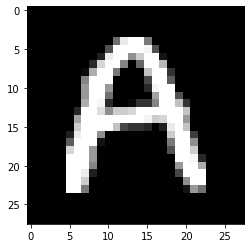

In [6]:
# This linearized representation of the pixels (a vector of 784 numbers) doesn't really matter for the training of a NN but you cannot easily visualise it. If you want to see an example of a letter, you'll need to reshape this vector:
plt.imshow(X[42,:].reshape(28, 28), cmap='gray')
# It's a letter A in grayscale!

Let's take a look at the target variable by plotting its histogram:

C:\Users\jelme\anaconda3\envs\Pyharm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

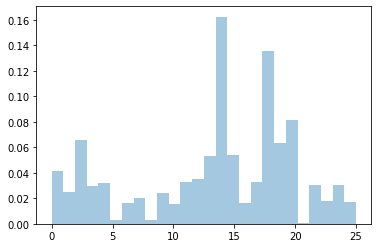

In [7]:
import seaborn as sns
sns.distplot(y, bins=26)

That doesn't look that great - the target labels are not uniformly distributed, on the other hand, when looking at the counts of each label, most of them seem to have at least 5000 examples (besides 'V'), so for now, let's not worry about it:

In [ ]:
from string import ascii_uppercase
d2l = { k: v for k, v in enumerate(ascii_uppercase)}
labels, counts = np.unique(y, return_counts=True)
for l, c in zip(labels, counts):
    print(f"{d2l[l]}: {c}")


### Using Logistic Regression to classify the letters:

Just for fun let's run a logistic regression classifier to see how well it performs (no k-fold cross validation here because we want to compare the results with a NN)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data set:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
# use the logistic regression classifier
# WARNING - this takes some time, go brew some tea in the meantime (5-15 minutes depending on your Python and machine)
# this is a simple fit on the training data set - no cross validation and so on
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
        ("scaler", MinMaxScaler()),
        ("logreg", LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=250, n_jobs=8, verbose=1))
    ])

log_reg.fit(X_train, y_train)

In [ ]:
# calculate the accuracy of the fitted model - not that bad

log_reg_accuracy = 1.0 - ( np.count_nonzero(log_reg.predict(X_val) - y_val) / np.size(y_val) )
print(f"The accuracy of the logistic regression model is: {log_reg_accuracy:.2f}")

### TODO 1

1. Construct a sequential, deep NN for classifying the handwritten letter, use the `accuracy` as an additional metrics when compiling the model. Think about which activation function to use in the last layer and what kind of loss function to apply. [1 point]
2. Train your network - don't forget to pass the validation data as an additional parameter when training! [1 point]
3. Plot the training curves. [1 point]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

#number of classes for the NN classifier
n_classes = np.size(np.unique(y))

X_reshaped = np.zeros(1)

# TODO 1
model = Sequential()

model.add(Dense(300, activation="relu", input_shape=X_train.shape[1:]))
model.add(Dense(100, activation="relu"))
model.add(Dense(n_classes, activation="softmax"))


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


NameError: name 'X_train' is not defined

In [ ]:
training = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_val, y_val))

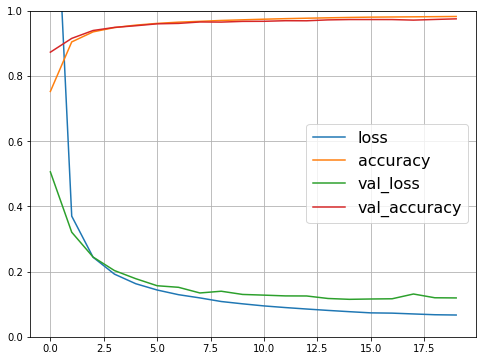

In [22]:
import pandas as pnd

pnd.DataFrame(training.history).plot(figsize=(8, 6))
plt.grid(True)
plt.legend(fontsize=16)
plt.gca().set_ylim(0, 1)
plt.show()


## Part 2: training a CNN.

It's getting more challanging now - as you've seen NN are unreasonably effective for simple problems, easily outperforming classical methods. 
In this part you'll try to use NNs to recognize (classify) images of traffic signs. This time, the data doesn't come pre-packaged as a pickle file but is stored as image files which need to be loaded and processed.

### Using a simple deep NN

Our traffic signs data set is somewhat different. Images are stored on the disk in two folders: `test` (vaidation) and `train`. For the `train` folder the labels correspond to the the subdirectories names, for the `test` the labels are in the `test.csv` file. We'll use [data flow generators](https://keras.io/api/preprocessing/image/#imagedatagenerator-class)

In [12]:
traffic_dir = './traffic/'
test_dir = './traffic/test/'
train_dir = './traffic/train/'
test_labels_file = './traffic/test.csv'

IMG_SIZE = (32, 32) # images will be rescaled to this size

### TODO 2

Before we even start do the following:

1) Visualize (display) a couple (say 16) randomly selected images from the training data set (they are in the `train_dir` subdirectories). `matplotlib.pyplot` has a function `imshow` for displaying images. You might need to scale the images to make them nicely fit in some arrangement. You can see how an image can be loaded in the code below. Notice that this task asks about randomly selected images. (`random`, `os.walk` and `os.listdir` will be helpfull) [1 point]

2) Plot the distribution (histogram) of the number of observations / examples for each class in the training data set. You can use `seaborn.histplot` for it. [1 point]

In [13]:
# TODO 2
import cv2
import os
# retrieving images form library
names = [name for name in os.listdir(train_dir) if not name.startswith('.')]

images = list()
labels = list()
size = 64, 64

#adding the images in train_dir to a vector
for picture in names:
    for _, _, files in os.walk(train_dir + picture):
        for file in files:
            #print(file)
            if file.endswith("png"):
                labels.append(picture)
                img = cv2.imread(os.path.join(train_dir, picture, file))
                images.append(cv2.resize(img, size))
        

In [36]:
import pandas as pnd

X = np.asarray(images)
X_train = X / np.max(X)

#adding some labels 
y_train = pnd.get_dummies(labels).values



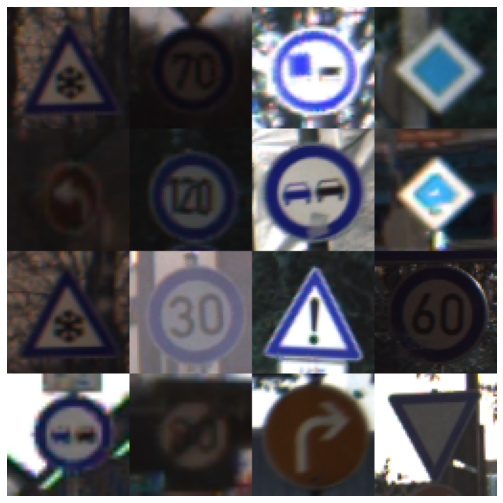

In [43]:
# shamelessly copied code fromm one of the demos
def plot_images(instances, images_per_row=10, **options):
    size = 64
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size, 3) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X_train[np.random.choice(len(X_train), size=16, replace=False)]
plot_images(example_images, images_per_row=4)
plt.show()

Now let's load the validation images and correctly assign labels to them read from the csv file:

In [16]:
import csv
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

try:
    # PIL is needed for image processing
    import PIL
except ImportError:
    print("You don't have the `PIL` module installed, which is surprising. Install it with `pip install --upgrade Pillow`")

# first read the validation data into numpy arrays
def read_data():

    labels = list()
    images = list()
    
    with open(test_labels_file) as csv_file:
        reader = csv.reader(csv_file)
        next(reader) # skip first row
        for row in reader:
            labels.append(row[6]) # the class of the image (label)
            path = traffic_dir + row[7].lower() # path to the image file
            image = load_img(path, target_size=IMG_SIZE, interpolation='bicubic') # read the image, applying the rescaling
            image_array = img_to_array(image) # convert image to array
            images.append(image_array)
        
        return np.array(images, dtype=np.float32) , np.array(labels, dtype=np.float32)

X_test, y_test = read_data()
# below is the number of classes (labels) we found:


We'll use ImageDataGenerator class to provide both the training and the validation data for fitting the NN model. ImageDataGenerator simplifies handling the images and feeding them to the NN. It can also do additional tasks, like e.g. scaling the images into the 0..1 range, like those two below:

In [17]:
# Create the test data generator:
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
# Create the training data generator (it's easy)
train_gen = ImageDataGenerator(rescale = 1.0/255.0)

### TODO 3

Create two data flows using the methods: `train_gen.flow_from_directory` and `test_gen.flow` [1 point]. For [`train_gen.flow_from_directory`](https://keras.io/api/preprocessing/image/#flowfromdirectory-method) you will need to  think about two arguments for it to work correctly:
* class_mode - this should be selected based on the loss function of the NN. It might be that you'll also need to one-hot encode the y_test vector, depending on your choice.
* classes - by default labels are assigned automatically using the alphabetical order of the sub-directories with the training images, which will ruin our labeling because it will imply the following ordering of the classes: \[0, 1, 10, 11, 12, ... 4, 41, 42, 5, 6, 7, 8, 9\]. Therefore, you'll need to pass a correct parameter here (if you do it incorrectly you'll be getting validation accuracy scores of around 0.05).

In [18]:
BATCH_SIZE = 32 # the standard batch size is 32
# TODO 3

listOfNumbers = list(range(0, 43))

strNumbers = [str(x) for x in listOfNumbers]
#generated a list of numbers as strings for 0 to 42
# using the sparse classifier to label the y axis
train_flow= train_gen.flow_from_directory(
    directory= train_dir,
    target_size= IMG_SIZE,
    shuffle= True, 
    classes= strNumbers,
    class_mode="sparse")

test_flow = test_gen.flow(
    X_test,
    y=y_test)

print(X_test.shape)
print(y_test.shape)

Found 39209 images belonging to 43 classes.
(12630, 32, 32, 3)
(12630,)


### TODO 4

Build a deep sequential model that uses a `Flatten` layer as its input and a couple of `Deep` layers. Pay attention that you loss function matches the chosen label encoding of the data. [1 point]

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

# TODO 4
# how many classes do I have for the last layer of my deep NN
n_classes = np.size(np.unique(y_test))
print (n_classes)

# building and compiling my NN with a bunch of dense layers aftet using the flatten layer to go from 2D to 1D
model_nn = Sequential()
model_nn.add(Flatten(input_shape=[32, 32, 3])) # based on the X_test.shape
model_nn.add(Dense(600, activation="relu"))
model_nn.add(Dense(300, activation="relu"))
model_nn.add(Dense(n_classes, activation="softmax"))

#using the sparse_categorical_crossentropy based on the way I encoded my labels with the .flow_from_directory
model_nn.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_nn.summary()

43
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 600)               1843800   
                                                                 
 dense_1 (Dense)             (None, 300)               180300    
                                                                 
 dense_2 (Dense)             (None, 43)                12943     
                                                                 
Total params: 2,037,043
Trainable params: 2,037,043
Non-trainable params: 0
_________________________________________________________________


### TODO 5
Train your network using the `train_flow` and `test_flow` flow generators and **plot the training curves** [1 point].

If done correctly you should achieve over 80% accuray on the validation dataset.


In [25]:
# TODO 5

#traning the model using the .flow and .flow_from_directory
training = model_nn.fit(
        train_flow,
        steps_per_epoch=train_flow.n//train_flow.batch_size,
        epochs=5,
        validation_data=test_flow,
        validation_steps=100)

Epoch 1/5
1225/1225 [==============================] - 88s 72ms/step - loss: 0.2705 - accuracy: 0.9199 - val_loss: 1.0430 - val_accuracy: 0.7581
Epoch 2/5
1225/1225 [==============================] - 67s 54ms/step - loss: 0.2415 - accuracy: 0.9282 - val_loss: 0.9436 - val_accuracy: 0.8250
Epoch 3/5
1225/1225 [==============================] - 68s 56ms/step - loss: 0.2182 - accuracy: 0.9356 - val_loss: 0.9129 - val_accuracy: 0.8259
Epoch 4/5
1225/1225 [==============================] - 69s 56ms/step - loss: 0.1992 - accuracy: 0.9406 - val_loss: 0.9995 - val_accuracy: 0.8238
Epoch 5/5
1225/1225 [==============================] - 71s 58ms/step - loss: 0.1922 - accuracy: 0.9414 - val_loss: 0.8704 - val_accuracy: 0.8356


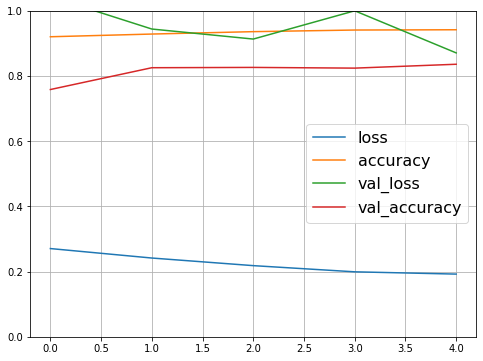

In [27]:
# I achieved over 80% accuracy
pnd.DataFrame(training.history).plot(figsize=(8, 6))
plt.grid(True)
plt.legend(fontsize=16)
plt.gca().set_ylim(0, 1)
plt.show()

### Using a CNN

### TODO 6

1. Create a convolutional NN model that consists of multiple `Conv2D` and `MaxPool2D` layers and ends with a `Dense` layer [1 point]. Remember about choosing the correct loss function for your training generator. 
2. Train it and **plot the training curves** [1 point]. You should easily achieve over 95% accuracy.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import layers
# TODO 6

model_cnn = Sequential()
# added convolutional layers, then a flatten layer and at the end the regular desne layers with the droput function
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(200, activation="relu"))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(Dense(100, activation="relu"))
model_cnn.add(layers.Dropout(0.2))
model_cnn.add(Dense(n_classes, activation="softmax"))


model_cnn.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [34]:
#tranning the CNN
training = model_cnn.fit(
        train_flow,
        steps_per_epoch=train_flow.n//train_flow.batch_size,
        epochs=5,
        validation_data=test_flow,
        validation_steps=100)

Epoch 1/5
1225/1225 [==============================] - 72s 59ms/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 0.2365 - val_accuracy: 0.9578
Epoch 2/5
1225/1225 [==============================] - 74s 61ms/step - loss: 0.0373 - accuracy: 0.9891 - val_loss: 0.2092 - val_accuracy: 0.9656
Epoch 3/5
1225/1225 [==============================] - 71s 58ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.2468 - val_accuracy: 0.9544
Epoch 4/5
1225/1225 [==============================] - 75s 61ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.1793 - val_accuracy: 0.9622
Epoch 5/5
1225/1225 [==============================] - 73s 60ms/step - loss: 0.0310 - accuracy: 0.9917 - val_loss: 0.1973 - val_accuracy: 0.9600


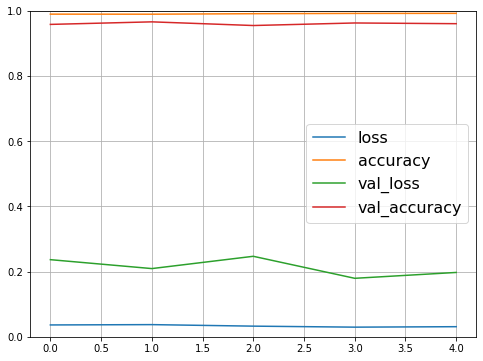

In [35]:
import pandas as pnd

# The CNN achieved over 95% accuracy
pnd.DataFrame(training.history).plot(figsize=(8, 6))
plt.grid(True)
plt.legend(fontsize=16)
plt.gca().set_ylim(0, 1)
plt.show()